### Linear regression with multiple features (Multiple Linear Regression)

If we take the same example. Now instead of just having the size of the house, you also have the number of bedrooms, number of floors, age of the home in years.

That means you have $x_1, x_2, x_3,$ and $x_4$

$x_j$ = $j^{th}$ feature  
$n$ = number of features  
$x^i$ = features of the $i^{th}$ training example  

$x^i$ is a vector of the features and represents all four features like  

$x^2$ = [1416 3 2 40] where $x^2_3$ = $2$  

Now we have that:  

$f_{w,b}(x) = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b$  

for $n$ features $f_{w,b}(x) = w_1x_1 + w_2x_2 + .... + w_nx_n + b$  

Can also be rewritten as a dot-product of the vectors:  

where $\vec{w}$ = $[w_1, w_2, ..., w_n]$ and $\vec{x}$ = $[x_1, x_2, ..., x_n]$  

then we have $f_{\vec{w},b}(\vec{x})$ = $\vec{w}\cdot\vec{x} + b$









### Vectorization

Vectorization will make the code shorter and make your code run faster.

$\vec{w} = [w_1, w_2, w_3]$
$b$ is a number
$\vec{x} = [x_1, x_2, x_3]$


In [1]:
import numpy as np

w = np.array([1.0, 2.5, -3.3])
b = 4
x = np.array([10, 20, 30])

In [2]:
f = 0
n = len(w)
for j in range(0,n):
    f = f + w[j]*x[j]

f = f + b

*Now using vectorization*:

In [3]:
f = np.dot(w,x) + b #This runs much faster and makes the code much shorter than above

### Gradient Descent for Multiple Linear Regression

Cost function written in vector notation:

$J(\vec{w},b)$  

**Alternative way for finding the gradient descent**:  

*Normal equation*:
* Only for linear regression
* Solve for w, b without iterations

Disadvantages:
* Not generalized to other learning algorithms
* Slow when the number of features is large (n > 10 000)

This is usually used in the backend of some ML libraries.

In [5]:
#Full example

import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2) # reduced display precision on numpy arrays

In [6]:
#Creating x_train and y_train
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [10]:
# b and w loaded with some initial values
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}")

w_init shape: (4,)


In [11]:
#Computing the cost variable
def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [12]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 1.5578904428966628e-12


In [13]:
#Gradient descent
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw

In [15]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: {tmp_dj_dw}")

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [16]:
# Further computing of the gradient descent

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = [] # An array to store the cost J and w's at each iteration
    w = copy.deepcopy(w_in) # Avoiding modifying global w within function
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        #Save J at each iteration
        if i < 10000:
            J_history.append(cost_function(X, y, w, b))

        if i% math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    
    return w, b, J_history

In [18]:
#Now for the implementation
initial_w = np.zeros_like(w_init)
initial_b = 0
# Settings for the gradient descent
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b found by gradient descent: {b_final:0.2f}, w: {w_final}")
m,_ = X_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train[i],w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b found by gradient descent: -0.00, w: [ 0.2   0.   -0.01 -0.07]
Prediction: 426.19, target value: 460
Prediction: 286.17, target value: 232
Prediction: 171.47, target value: 178


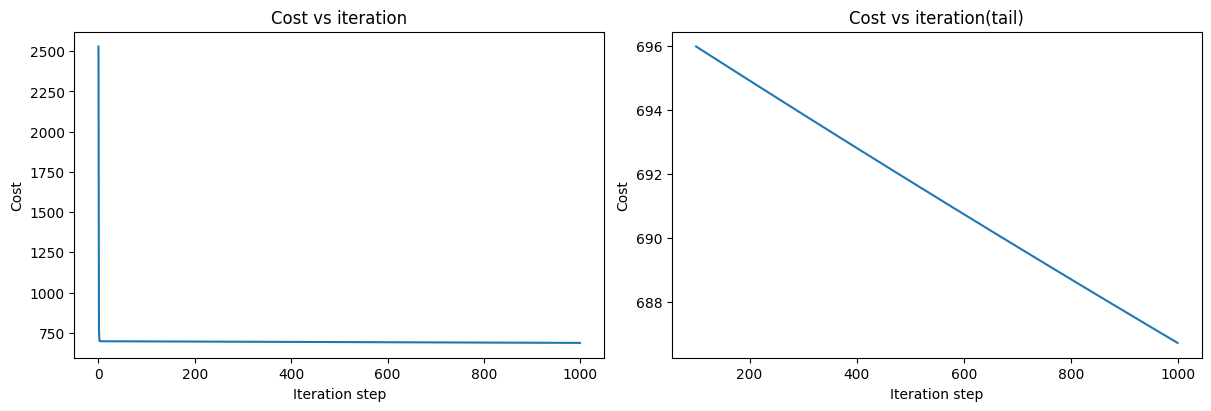

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs iteration"); ax2.set_title("Cost vs iteration(tail)")
ax1.set_ylabel("Cost"); ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration step"); ax2.set_xlabel("Iteration step")
plt.show()

### Feature scaling - how to make *gradient descent* work much better

If a feature is large e.g $x_1$ then $w_1$ is more likely to be small and vica versa.  

This can also be seen in a contour plot of $J(\vec{w},b)$ where the plot is $w_1$ vs $w_2$. The range of the contour would stretch more on the $w_2$ axis, say from 0 to 100. Whereas, on the $w_1$ axis it would stretch from, say 0 to 1.  

**Scaling**, would therefore rescale the features and would let $w_1$ take $w_2$ reasonable values with regards to one another. Then the contour would range on both axes, say from 0 to 1.

Scaling can be done as follows:
* $x_1$ can be scaled by using the max number of the range of features and dividing it into each number  
* *Mean Normalization*: Rescale both features such that both are centered around zero, say between -1 and 1
    * First find the average or mean of $x_1$ then do the following:
    $x_1 = \frac{x_1 - mean}{max - min}$
    * Then you have *normalized* $x_1$
* *Z-score Normalization*: Calculate the mean and the standard deviation then do the following:
    * $x_1 = \frac{x_1 - mean}{\sigma}$  

As a rule of thumb it is best to scale the features somewhere between 0 and 3.

### Checking Gradient Descent for Convergence

How to make sure it is working well:
* Plot the cost function $J$ which is calculated on the training set for each iteration update of $w$ and $b$
    * Here you will be able to spot how the cost function is behaving
    * If $J$ is consistently decreasing, then it is good
    * If $J$ increases at any point, then the *learning rate* is not good
    * Here you can also spot at what point (num of iterations) it converges (the cost function is relatively flat)

You can also check if it converges by using an automatic conversion test, e.g.  

Let $\epsilon$ be equal to $10^{-3}$  

Then check if $J$ decreases by less than or equal to $\epsilon$ to declare convergence.

### Choosing an appropriate *Learning Rate*

If you plot the cost $J$ over the iterations, this can give you a good indication that there is a problem with the learning rate.  

**Typically, (most of the time) decreasing the learning rate can solve quite a lot of your problems.**  

A good test to do is:
* Check if $J$ is consistently decreasing with every iteration
* This can be done by setting $\alpha$ to a very small value - **This is also good for debugging!**
* Then track the decreasing of the iterations  


A good rule of thumb is to set $\alpha$ to be a value like $0.001$ and then afterward $0.01$, $0.1$, $1$ and so on. Run for a few iterations and see what happens.

Try to find a value that is **too small** and also **too big**, then you can play around with the range to find the optimal learning rate.  

**Remember**: When $\alpha$ is too large, plotting $J$ will show jumps or bumps in the graph.  

### Feature engineering

Creating a new feature out of existing features. You do this by combining the already existing features (and keeping the old ones).  

This may give you better insights, e.g. if you had the 'frontage' and 'depth' of a house, you might want to combine it to make the area.

### **Polynomial Regression**

e.g $f_{\vec{w},b}(x) = w_1x_1 + w_2x^2 + w_3x^3 + b$ 

This is to fit a curved line in the shape of $x^3$.  

**Note**: In polynomial regression feature scaling becomes critically important.  

### Linear Regression with Sci-kit learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
# import some dataset

X_train, y_train = load_data #Loading the data in
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

#Scaling and normalizing the data
scaler = SGDRegressor(max_iter=1000)
X_norm = scaler.fit_transform(X_train)

#Creating and fitting the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm,y_train)

#Viewing the parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

#Making the predictions
y_pred_sgd = sgdr.predict(X_norm) # Making the prediction using sgdr.predict()
y_pred = np.dot(X_norm,w_norm) + b_norm # Making the prediction using w,b
print(f"prediction using np.dot() and sgdr.predict() match: {(y_pred ==  y_pred_sgd).all()}")

#Plotting the results
fig, ax = plt.subplots(1,4,figsize = (12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = "target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color = "orange", label = "predict")
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target vs prediction using z-score normalized model")
plt.show()

